In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [25]:
col_name_map = {
    "dataset": "Dataset",
    "distance": "Distance",
    "angle": "Angle",
    "tau": r"$\tau$",
    "significance": "DoF",
    "significance_text": "Direction",
}

value_map = {
    "theta": r"$\theta$",
    "phi": r"$\phi$",
    "psi": r"$\psi$",
    "tx": r"$t_x$",
    "ty": r"$t_y$",
    "tz": r"$t_z$",
    
    "leftward": "-",
    "rightward": "+",
    "up": "-",
    "down": "+",

    "upward": "+",
    "downward": "-",
    "right": "+",
    "left": "-",

    "forward": "+",
    "backward": "-",
    "clockwise": "+",
    "counterclockwise": "-",

    "15": "15°",
    "30": "30°",
    "45": "45°",
    "60": "60°",
}

In [26]:
tau_order = ["15°", "30°", "45°", "60°"]
dof_order = [r"$\theta$", r"$\phi$", r"$\psi$", r"$t_x$", r"$t_y$", r"$t_z$"]
direction_order = ["+", "-"]

# C1

In [27]:
c1_seven_scenes = Path("/home/u5u/kdeng.u5u/benchmark/single-dof-camera-motion-7-scenes")
c1_scannet = Path("/home/u5u/kdeng.u5u/benchmark/single-dof-camera-motion-scannet")
c1_scannetpp = Path("/home/u5u/kdeng.u5u/benchmark/single-dof-camera-motion-scannetpp")

c1_seven_scenes = pd.read_json(c1_seven_scenes / "global_metadata.jsonl", lines=True)
c1_scannet = pd.read_json(c1_scannet / "global_metadata.jsonl", lines=True)
c1_scannetpp = pd.read_json(c1_scannetpp / "global_metadata.jsonl", lines=True)

c1_seven_scenes["dataset"] = "7 Scenes"
c1_scannet["dataset"] = "ScanNet"
c1_scannetpp["dataset"] = "ScanNet++"

c1 = pd.concat([c1_seven_scenes, c1_scannet, c1_scannetpp], ignore_index=True)

In [28]:
c1.rename(columns=col_name_map, inplace=True)
c1.replace(value_map, inplace=True)
c1["DoF"] = pd.Categorical(c1["DoF"], categories=dof_order, ordered=True)
c1["Direction"] = pd.Categorical(c1["Direction"], categories=direction_order, ordered=True)
c1

,scene,seq,pair,tx,ty,tz,theta,phi,psi,tx_text,ty_text,tz_text,theta_text,phi_text,psi_text,DoF,Direction,significance_value,Dataset,hash_id
0,heads,seq-02,000153-000169,0.066359,-0.098496,-0.054539,-10.336696,3.419335,-1.516052,+,-,-,-,+,+,$\theta$,-,10.336696,7 Scenes,NaN
1,heads,seq-02,000387-000512,0.063981,0.425833,0.000288,2.424613,3.324573,-0.202610,+,+,+,+,+,+,$t_y$,+,0.425833,7 Scenes,NaN
2,heads,seq-01,000076-000085,0.046971,-0.027981,0.015635,-1.940069,4.977815,11.057283,+,-,+,-,+,-,$\psi$,-,11.057283,7 Scenes,NaN
3,heads,seq-01,000094-000124,0.145486,-0.032827,0.008387,-2.288451,0.491837,-10.845417,+,-,+,-,+,+,$\psi$,+,10.845417,7 Scenes,NaN
4,heads,seq-01,000208-000242,0.146946,-0.012877,-0.030513,1.425768,-15.349436,-2.516914,+,-,-,+,-,+,$\phi$,-,15.349436,7 Scenes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,NaN,NaN,001204-001209,0.007508,-0.039928,0.034235,4.976444,-26.213817,-0.125681,+,-,+,+,-,-,$\phi$,-,26.213817,ScanNet++,1be2c31cac
1160,NaN,NaN,005084-005092,-0.117685,0.053334,0.039726,-0.384747,-15.649374,1.087645,-,+,+,-,-,+,$\phi$,-,15.649374,ScanNet++,7dfdff1b7d
1161,NaN,NaN,001401-001402,0.030497,-0.019458,-0.007414,-1.318603,25.073160,-0.704760,+,-,-,-,+,-,$\phi$,+,25.073160,ScanNet++,38d58a7a31
1162,NaN,NaN,001402-001403,-0.049386,-0.003461,-0.047499,0.568914,-15.391351,-0.727973,-,-,-,+,-,-,$\phi$,-,15.391351,ScanNet++,38d58a7a31


In [29]:
filter = c1[["Dataset", "DoF", "Direction", "significance_value"]]
# filter

In [30]:
# count
group = filter.groupby(["Dataset", "DoF", "Direction"]).size().reset_index(name="count")

/local/user/1483801110/ipykernel_83113/667473847.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = filter.groupby(["Dataset", "DoF", "Direction"]).size().reset_index(name="count")


In [31]:
pivot = group.pivot_table(
    index="Dataset",
    columns=["DoF", "Direction"],
    values="count",
)

/local/user/1483801110/ipykernel_83113/2491022736.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = group.pivot_table(


In [32]:
pivot.columns.names = [None, None]
pivot.index.name = None

In [33]:
pivot

$\theta$       $\phi$        $\psi$       $t_x$       $t_y$       \
                 +     -      +      -      +     -     +     -     +    -   
7 Scenes      41.0  17.0   35.0   50.0   48.0  39.0  19.0  13.0   7.0  3.0   
ScanNet       76.0  46.0  106.0   37.0   20.0  14.0  32.0  16.0   8.0  7.0   
ScanNet++     90.0  56.0  155.0  107.0    2.0   0.0  35.0  28.0   3.0  1.0   

          $t_z$       
              +    -  
7 Scenes   14.0  4.0  
ScanNet    13.0  6.0  
ScanNet++  14.0  2.0

In [34]:
# counting number as new table
group = filter.groupby(["Dataset", "DoF"]).size().reset_index(name="count")

pivot = group.pivot_table(
    index="Dataset",
    columns="DoF",
    values="count",
)

/local/user/1483801110/ipykernel_83113/2243048341.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = filter.groupby(["Dataset", "DoF"]).size().reset_index(name="count")
/local/user/1483801110/ipykernel_83113/2243048341.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = group.pivot_table(


In [35]:
pivot.columns = ["Pitch", "Yaw", "Roll", "L/R", "U/D", "F/B"]
pivot = pivot[["Pitch", "Yaw", "Roll", "U/D", "L/R", "F/B"]]
pivot

,Pitch,Yaw,Roll,U/D,L/R,F/B
Dataset,,,,,,
7 Scenes,58.0,85.0,87.0,10.0,32.0,18.0
ScanNet,122.0,143.0,34.0,15.0,48.0,19.0
ScanNet++,146.0,262.0,2.0,4.0,63.0,16.0


In [36]:
pivot.to_csv("/home/u5u/kdeng.u5u/spatial-reasoning-of-LMs/result/csv-tables/c1-counting-table.csv")

# C2

In [37]:
c2_seven_scenes_dir = Path("/home/u5u/kdeng.u5u/benchmark/obj-centered-view-shift-7-scenes")
c2_scannet_dir = Path("/home/u5u/kdeng.u5u/benchmark/obj-centered-view-shift-scannet")

c2_seven_scenes = pd.DataFrame()
for tau_dir in c2_seven_scenes_dir.iterdir():
    if not tau_dir.is_dir():
        continue
    tau = tau_dir.name.split("-")[-2]
    tau_df = pd.read_json(tau_dir / "global_metadata.jsonl", lines=True)
    tau_df["tau"] = tau
    c2_seven_scenes = pd.concat([c2_seven_scenes, tau_df], ignore_index=True)

c2_seven_scenes["dataset"] = "7 Scenes"

c2_scannet = pd.DataFrame()
for tau_dir in c2_scannet_dir.iterdir():
    if not tau_dir.is_dir():
        continue
    tau = tau_dir.name.split("-")[-2]
    tau_df = pd.read_json(tau_dir / "global_metadata.jsonl", lines=True)
    tau_df["tau"] = tau
    c2_scannet = pd.concat([c2_scannet, tau_df], ignore_index=True)

c2_scannet["dataset"] = "ScanNet"

c2 = pd.concat([c2_seven_scenes, c2_scannet], ignore_index=True)

In [38]:
c2.rename(columns=col_name_map, inplace=True)
c2.replace(value_map, inplace=True)
c2[r"$\tau$"] = pd.Categorical(c2[r"$\tau$"], categories=tau_order, ordered=True)
c2

,scene,seq,pair,tx,ty,tz,theta,phi,psi,tx_text,ty_text,tz_text,theta_text,phi_text,psi_text,Distance,Angle,$\tau$,Dataset
0,chess,seq-01,000250-000905,-0.466951,-0.464385,0.567719,52.665732,44.342935,92.479236,-,-,+,+,+,+,126.955016,60.433547,60°,7 Scenes
1,chess,seq-02,000000-000524,1.346239,-0.471252,0.852478,18.352580,-46.106792,-33.895175,+,-,+,+,-,-,280.931228,63.753969,60°,7 Scenes
2,chess,seq-03,000000-000205,1.188509,-0.717066,1.394439,30.290955,-41.683886,-65.132560,+,-,+,+,-,-,139.715374,60.167460,60°,7 Scenes
3,chess,seq-03,000205-000434,-0.852646,-1.315292,0.635006,2.744439,52.789925,78.514316,-,-,+,+,+,+,195.069964,60.157159,60°,7 Scenes
4,chess,seq-03,000434-000643,1.292262,-0.417934,1.161582,52.521749,-34.100256,-56.131436,+,-,+,+,-,-,299.395617,65.330545,60°,7 Scenes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,scene0726_00,NaN,000752-000807,0.412115,0.352478,-0.286766,23.877857,-6.929228,-40.644448,+,+,-,+,-,-,286.589041,37.576380,30°,ScanNet
1869,scene0726_00,NaN,001057-001133,0.275767,-0.650360,0.876083,-11.197203,-16.508706,-18.052548,+,-,+,-,-,-,238.626884,30.352147,30°,ScanNet
1870,scene0780_00,NaN,000825-000979,1.452950,0.045632,0.431560,1.853142,-16.994487,-4.266639,+,+,+,+,-,-,299.971528,31.495320,30°,ScanNet
1871,scene0780_00,NaN,001504-001705,-1.446784,-0.198412,0.351889,2.892403,42.337197,25.346796,-,-,+,+,+,+,299.084638,30.334551,30°,ScanNet


In [45]:
filter = c2[["Dataset", r"$\tau$", "tx_text", "Distance"]]

In [46]:
group = filter.groupby(["Dataset", r"$\tau$"]).size().reset_index(name="count")

/local/user/1483801110/ipykernel_83113/1292096517.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = filter.groupby(["Dataset", r"$\tau$"]).size().reset_index(name="count")


In [47]:
pivot = group.pivot_table(
    index="Dataset",
    columns=[r"$\tau$"],
    values="count",
)

/local/user/1483801110/ipykernel_83113/627399303.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = group.pivot_table(


In [48]:
# fine grained modification
pivot.columns.names = [r"$\tau$"]
pivot.index.name = None

In [49]:
pivot

$\tau$,15°,30°,45°,60°
7 Scenes,331.0,131.0,77.0,37.0
ScanNet,669.0,324.0,191.0,113.0


In [50]:
print(pivot.to_latex(
    column_format="l" + "c" * len(pivot.columns),
    label="tab:stat-tables",
    caption="Statistics of c2 dataset",
    float_format="%.0f",
))

\begin{table}
\caption{Statistics of c2 dataset}
\label{tab:stat-tables}
\begin{tabular}{lcccc}
\toprule
$\tau$ & 15° & 30° & 45° & 60° \\
\midrule
7 Scenes & 331 & 131 & 77 & 37 \\
ScanNet & 669 & 324 & 191 & 113 \\
\bottomrule
\end{tabular}
\end{table}



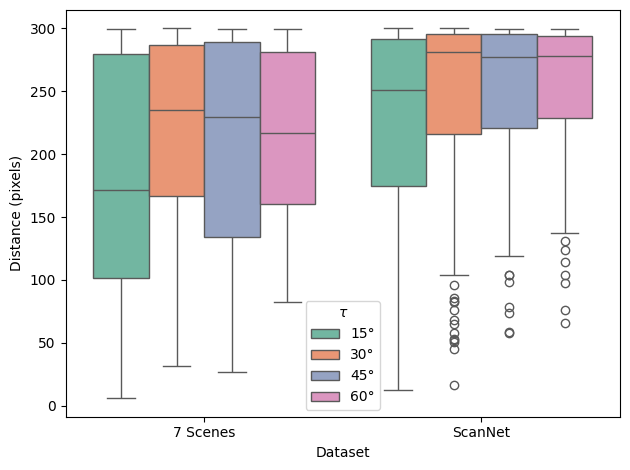

In [ ]:
distance_plot = sns.boxplot(data=c2, x="Dataset", y="Distance", hue=r"$\tau$", palette="Set2")
plt.ylabel("Distance (pixels)")
plt.tight_layout()

plt.savefig("/home/u5u/kdeng.u5u/benchmark/c2-distance-boxplot.pdf", bbox_inches='tight')

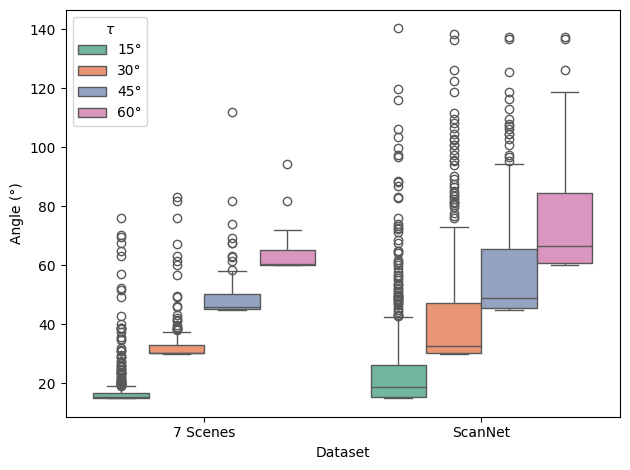

In [ ]:
angle_plot = sns.boxplot(data=c2, x="Dataset", y="Angle", hue=r"$\tau$", palette="Set2")
plt.ylabel("Angle (°)")
plt.tight_layout()

plt.savefig("/home/u5u/kdeng.u5u/benchmark/c2-angle-boxplot.pdf", bbox_inches='tight')